# Houston Traffic Breakdown

This data set has been updated 3:30 PM ET Monday, May 11. 

Data shows that although mobility declined nationally since states and localities began shelter-in-place strategies to stem the spread of COVID-19, the numbers are starting to climb again as more people venture out and travel further from their homes.

This distribution contains county level data for vehicle miles traveled (VMT) from __StreetLight Data, Inc.__ updated three times a week. This data offers a detailed look at estimates of how much people are moving around in each county.

Data available has a two day lag - the most recent data is from two days prior to the update date. Going forward, this dataset will be updated by AP at 3:30pm ET on Monday, Wednesday and Friday each week.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import arange

In [4]:
dataDir = "./"
df = pd.read_csv(dataDir + "traffic_change_Houston_march-may.csv", parse_dates=['date']) 
df = df[['county_name','date','percent_change_from_jan','mean7_percent_change_from_jan']]

# Preview the first 5 lines of the loaded data 
df.head()

,county_name,date,percent_change_from_jan,mean7_percent_change_from_jan
0,Fort Bend,2020-03-11,35.91,51.93
1,Fort Bend,2020-03-12,43.94,51.19
2,Fort Bend,2020-03-13,42.79,47.58
3,Fort Bend,2020-03-10,23.87,46.85
4,Fort Bend,2020-03-09,31.04,42.38


In [5]:
df.county_name.value_counts()

Fort Bend     69
Montgomery    69
Brazoria      69
Harris        69
Galveston     69
Name: county_name, dtype: int64

In [6]:
# dataFrame for a single county indexed by date
brazoria = df.loc[df.county_name == 'Brazoria'].set_index('date')
galveston = df.loc[df.county_name == 'Galveston'].set_index('date')
harris = df.loc[df.county_name == 'Harris'].set_index('date')
ftBend = df.loc[df.county_name == 'Fort Bend'].set_index('date')
montgomery = df.loc[df.county_name == 'Montgomery'].set_index('date')

class trafficData:
    pass

In [7]:
houston = trafficData()
houston.county = [brazoria, galveston, harris, ftBend, montgomery]
houston.countyName = [brazoria.county_name[0], galveston.county_name[0],\
                     harris.county_name[0], ftBend.county_name[0],\
                     montgomery.county_name[0]]
houston.startDate =['2020-3-1','2020-4-1','2020-5-1']
houston.endDate =['2020-3-7','2020-4-7','2020-5-7']
houston.month =['March', 'April', 'May']

dayNum = [1,2,3,4,5,6,7]
countyNum = len(houston.county)
monthNum = len(houston.month)

### Day-by-day percent change for the first week of each month per County

Counties included are:
- Brazoria
- Galveston
- Harris
- Fort Bend
- Montgomery

__Note:__ the y-axis min and max vary per county

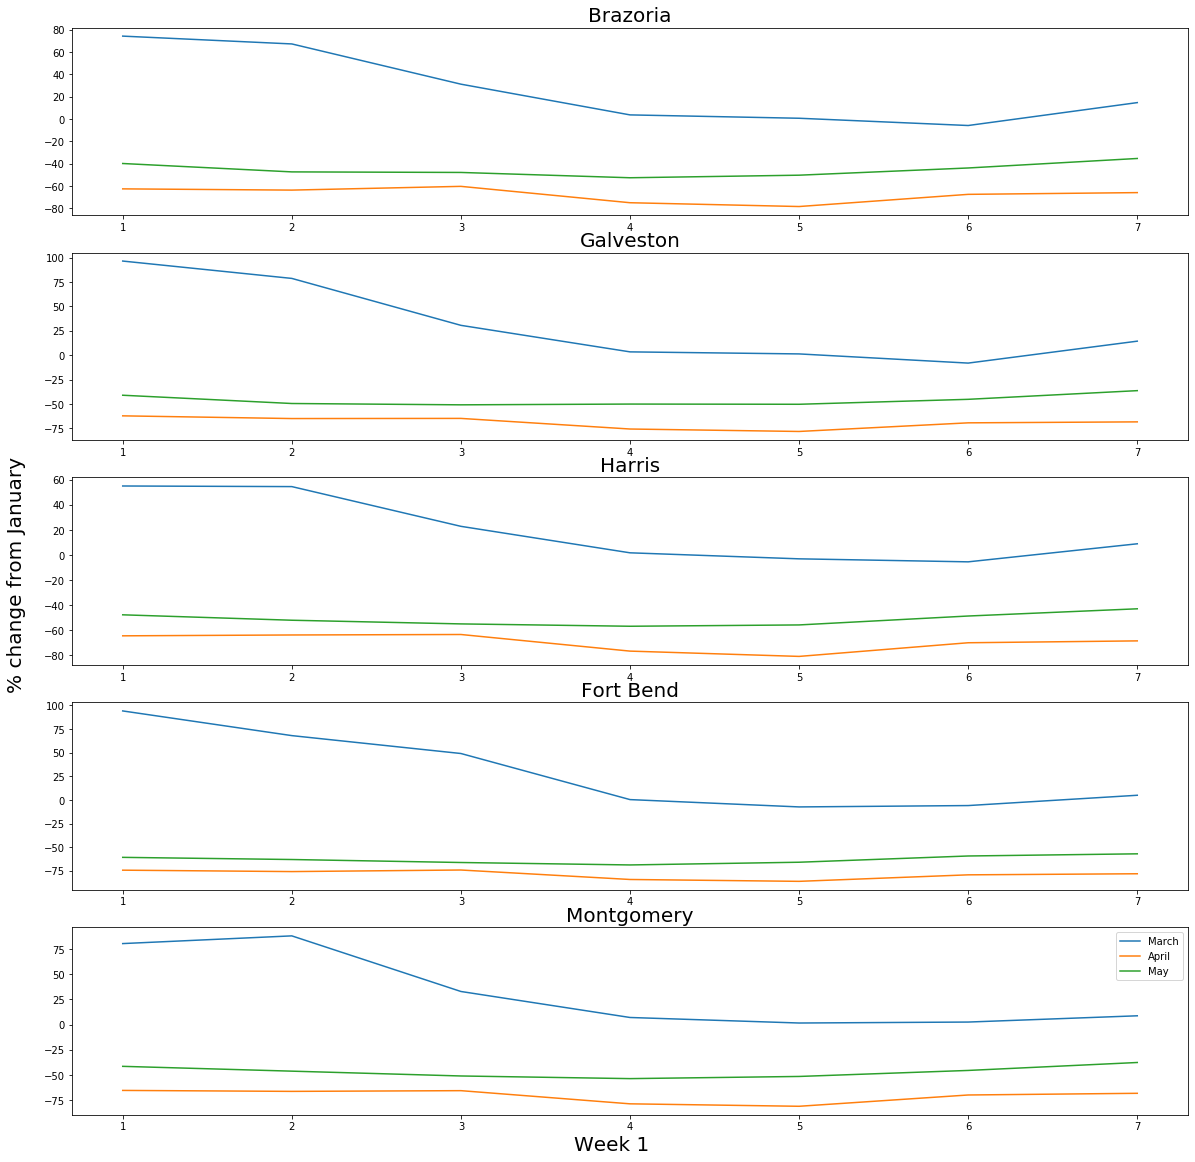

In [8]:
# Share a Y axis with each row of subplots
fig,ax = plt.subplots(countyNum, 1, sharex=True, sharey=True,figsize=(20,20))

for county in range( countyNum ):
    data=houston.county[county]
    plt.subplot(countyNum, 1, county+1)
    for month in range( monthNum ):
        plt.plot(dayNum, data[houston.startDate[month]:houston.endDate[month]].percent_change_from_jan,\
        label=houston.month[month])
    
    plt.title(data.county_name[0], fontsize=20)

plt.legend()
fig.text(0.5, 0.1, 'Week 1', ha='center',fontsize=20)
fig.text(0.08, 0.5, '% change from January', va='center', rotation='vertical', fontsize=20)
plt.show()

In [18]:
print('Minimum drop compared to jan per county')

print('\nBrazoria')
print('Min Date: ', brazoria['percent_change_from_jan'].idxmin())
print('Min percent: ', brazoria['percent_change_from_jan'].min())

print('\nGalveston')
print('Min Date: ', galveston['percent_change_from_jan'].idxmin())
print('Min percent: ', galveston['percent_change_from_jan'].min())

print('\nHarris')
print('Min Date: ', harris['percent_change_from_jan'].idxmin())
print('Min percent: ', harris['percent_change_from_jan'].min())

print('\nFort Bend')
print('Min Date: ', ftBend['percent_change_from_jan'].idxmin())
print('Min percent: ', ftBend['percent_change_from_jan'].min())

print('\nMontgomery')
print('Min Date: ', montgomery['percent_change_from_jan'].idxmin())
print('Min percent: ', montgomery['percent_change_from_jan'].min())

Minimum drop compared to jan per county

Brazoria
Min Date:  2020-04-05 00:00:00
Min percent:  -78.45

Galveston
Min Date:  2020-04-05 00:00:00
Min percent:  -78.05

Harris
Min Date:  2020-04-05 00:00:00
Min percent:  -80.84

Fort Bend
Min Date:  2020-04-05 00:00:00
Min percent:  -86.09

Montgomery
Min Date:  2020-04-05 00:00:00
Min percent:  -80.89


### Percent change for each County over all time

Here we plot the change in percentage over all of the time

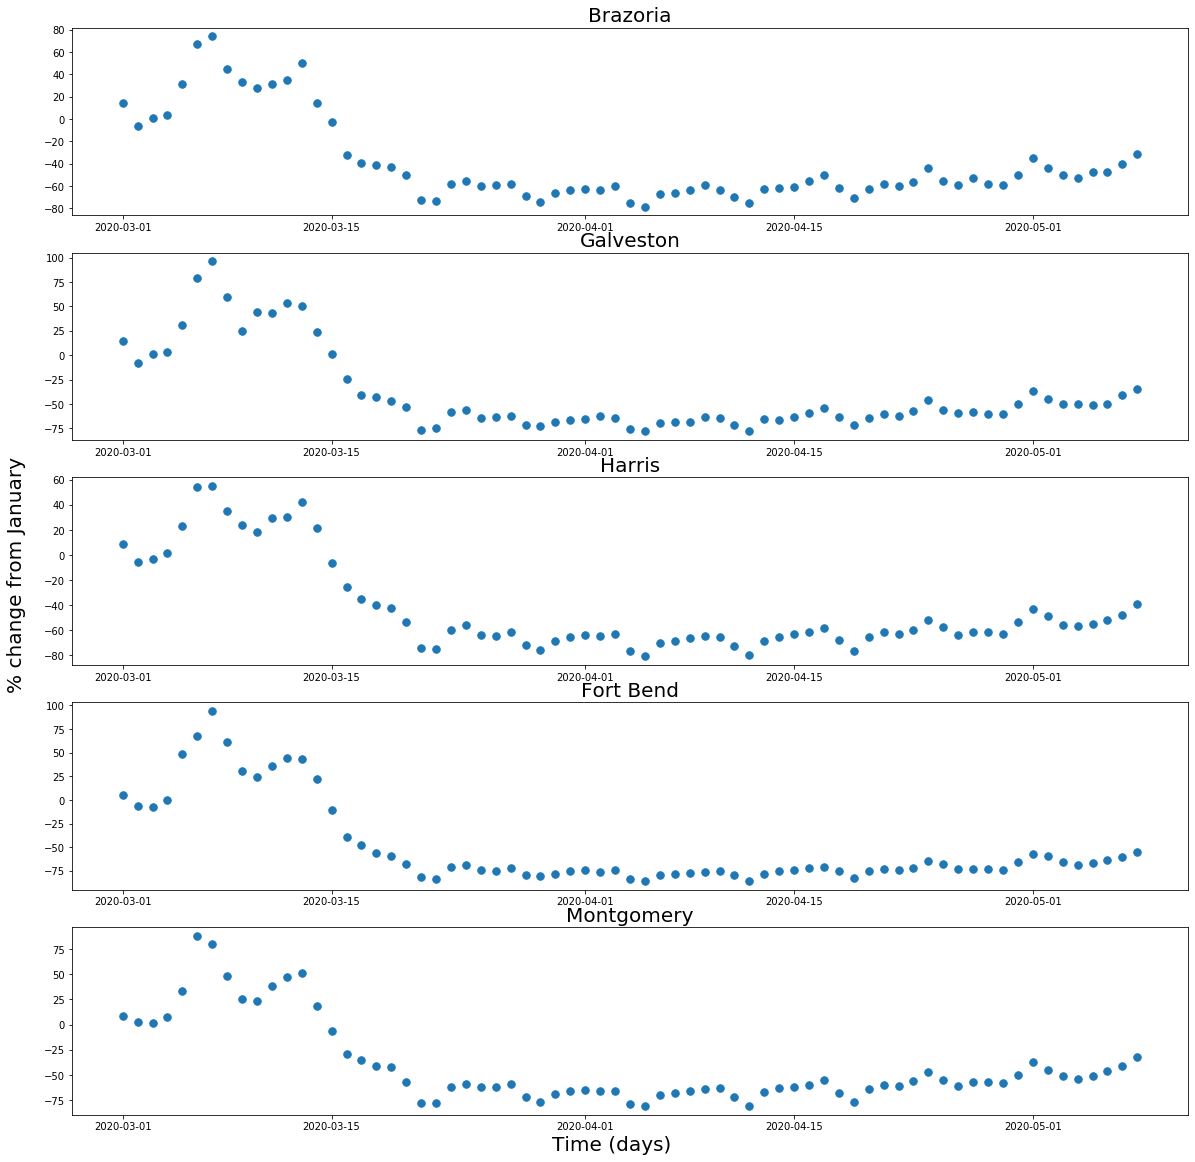

In [7]:
# Share a Y axis with each row of subplots
fig,ax = plt.subplots(countyNum, 1, sharex=True, sharey=True,figsize=(20,20))

for county in range(countyNum):
    data=houston.county[county]
    plt.subplot(countyNum, 1, county+1)
    plt.plot(data.percent_change_from_jan, '.', markersize=15)
    plt.title(data.county_name[0], fontsize=20)

fig.text(0.5, 0.1, 'Time (days)', ha='center',fontsize=20)
fig.text(0.08, 0.5, '% change from January', va='center', rotation='vertical', fontsize=20)
plt.show()

### Weekly average per county per month

In [8]:
# Calculate average percent change for each county and each month
def weeklyMean(data, startDate, endDate):
    return data[startDate : endDate].mean(skipna=True)[0]

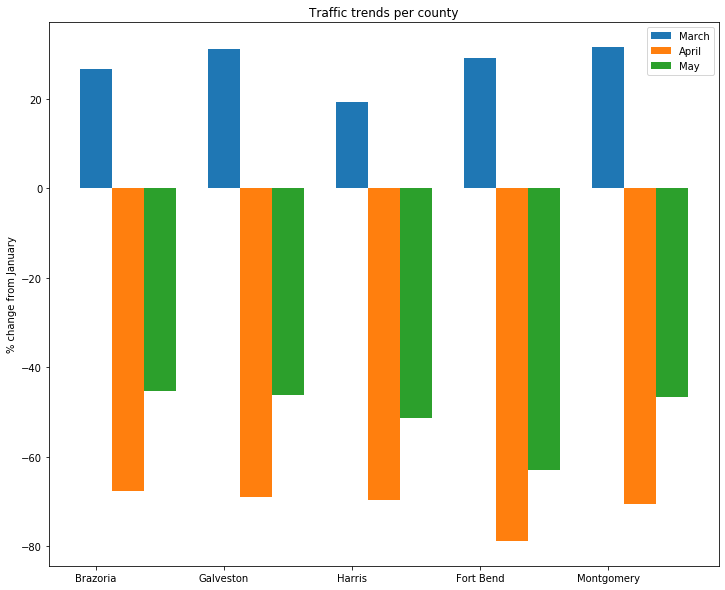

In [9]:
countyAvg = [None]*countyNum
X = arange(countyNum)
w = 0.25
shift = [0., w, 2*w]

fig, ax = plt.subplots(figsize=(12,10))

for month in range( monthNum ):
    for county in range( countyNum ):
        countyAvg[county] = weeklyMean(houston.county[county], \
                    houston.startDate[month], houston.endDate[month])

    ax.bar(X + shift[month], countyAvg, width=w, \
           label=houston.month[month])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% change from January')
ax.set_title('Traffic trends per county')
ax.set_xticks(X)
ax.set_xticklabels(houston.countyName)
ax.legend()
plt.show()

fig.savefig('traffic_trends_mar-may2020.png', dpi=fig.dpi)

by Ivana Escobar May 2020